# Classification Example

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Load Data

In [2]:
# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data=np.c_[ data.data, data.target ],  
                  columns=np.append(data.feature_names, 'target'))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
df.shape

(569, 31)

## Train / Test

In [4]:
X = df.drop('target', axis=1)
y = df['target']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=42)

## Cross-validation

In [5]:
df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [6]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [7]:
# Declare KFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [8]:
# Declare scores to be used
scoring = {
    'Acc': make_scorer(accuracy_score),
    'Prec': make_scorer(precision_score),
    'Rec': make_scorer(recall_score)
}

In [9]:
def print_metrics(cv_results):
    for sc in scoring.keys():
        print(f'Train {sc}:', cv_results[f'train_{sc}'].mean().round(2))
    print()
    for sc in scoring.keys():
        print(f'Validation {sc}:', cv_results[f'test_{sc}'].mean().round(2))

## Baseline

In [10]:
from sklearn.dummy import DummyClassifier

In [21]:
bl = DummyClassifier(strategy='most_frequent')
bl_cv = cross_validate(bl, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(bl_cv)

Train Acc: 0.63
Train Prec: 0.63
Train Rec: 1.0

Validation Acc: 0.63
Validation Prec: 0.63
Validation Rec: 1.0


## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression(max_iter=10_000)
lr_cv = cross_validate(lr, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(lr_cv)

Train Acc: 0.96
Train Prec: 0.97
Train Rec: 0.97

Validation Acc: 0.95
Validation Prec: 0.95
Validation Rec: 0.97


## K-Neighbours Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn_cv = cross_validate(knn, X_train, y_train, cv=kf,
                        scoring=scoring, return_train_score=True)

print_metrics(knn_cv)

Train Acc: 0.96
Train Prec: 0.96
Train Rec: 0.98

Validation Acc: 0.95
Validation Prec: 0.95
Validation Rec: 0.97


### Confusion Matrix Example

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

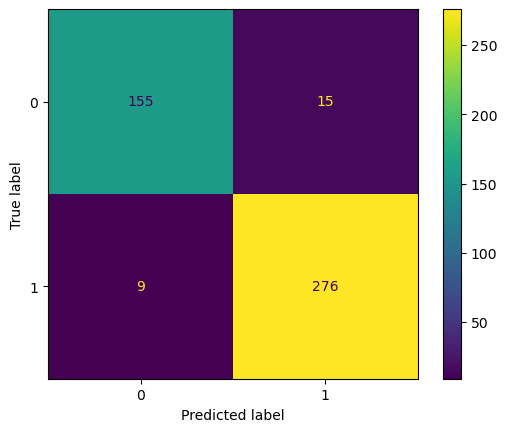

In [17]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)
# cross_val_predict returns the predictions for each data point in the validation sets
val_preds = cross_val_predict(knn, X_train, y_train, cv=kf)

cm = confusion_matrix(y_train, val_preds, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])
disp.plot()
plt.show()

## Decision Tree

In [18]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [19]:
dt = DecisionTreeClassifier(max_depth=2)
dt_cv = cross_validate(dt, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(dt_cv)

Train Acc: 0.96
Train Prec: 0.96
Train Rec: 0.97

Validation Acc: 0.93
Validation Prec: 0.94
Validation Rec: 0.94


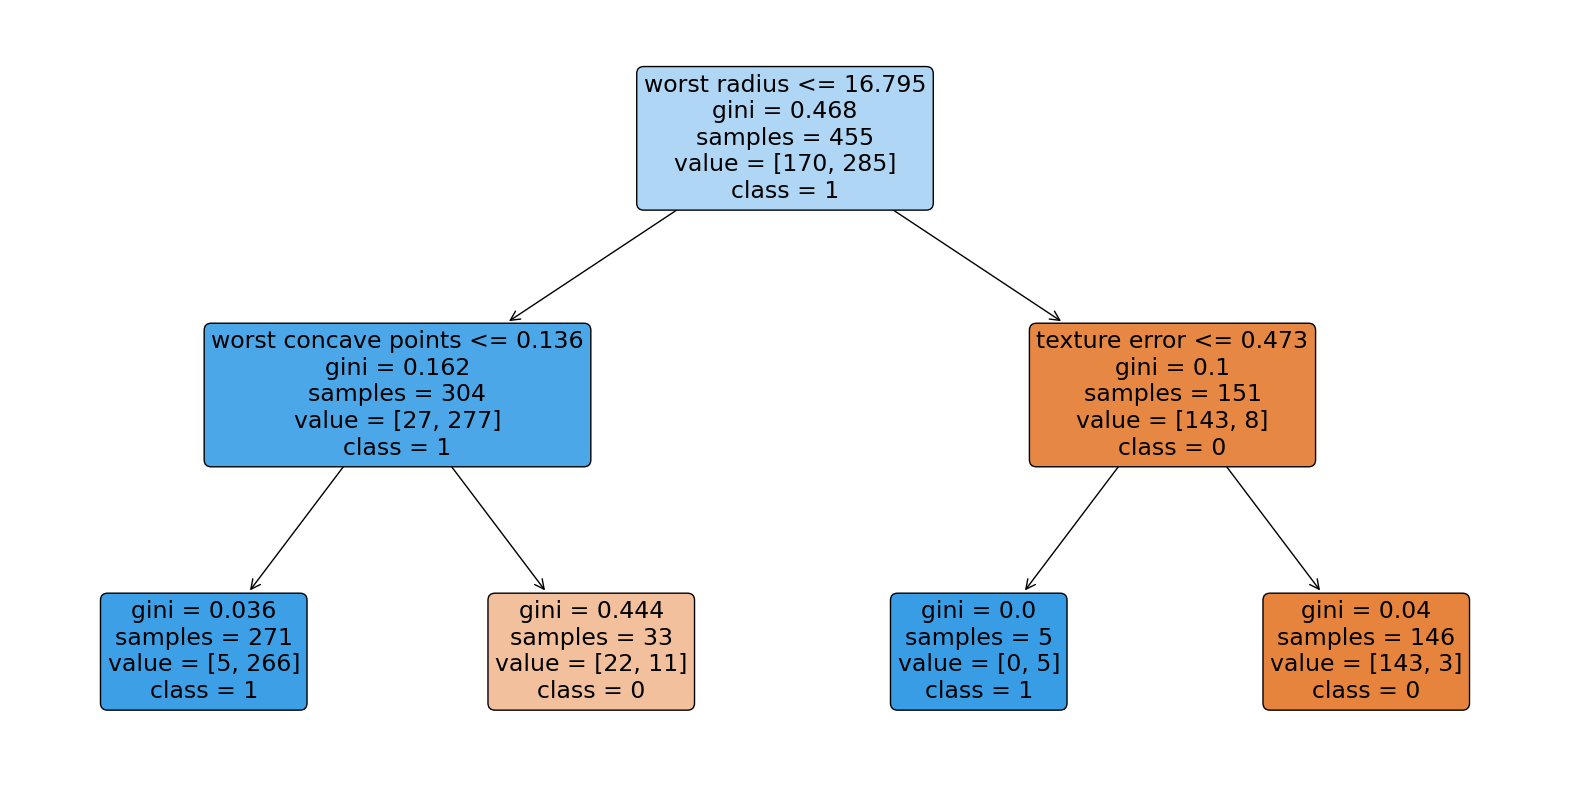

In [20]:
dt.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=list(X.columns),
          class_names=['0', '1'], rounded=True)
plt.show()